In [2]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
import cv2.typing as cvt

In [3]:
img_path = "./all-unknown/obama-2-17.jpg"
# plt.axis('off')
img = plt.imread(img_path)
# plt.imshow(img)

number of faces: 8


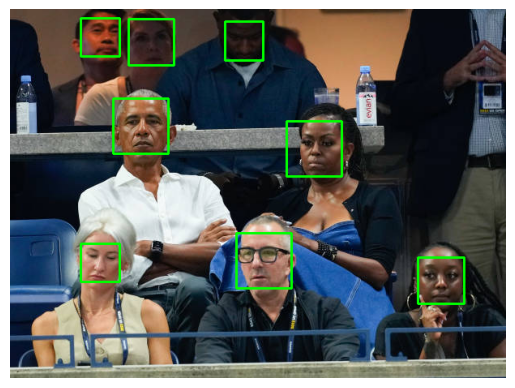

In [4]:
import face_recognition

face_image = face_recognition.load_image_file(img_path)
face_locations = face_recognition.face_locations(face_image, 1, "cnn")


img = plt.imread(img_path)

for face_location in face_locations:
    top, right, bottom, left = face_location
    cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
plt.axis("off")
plt.imshow(img)

print(f"number of faces: {len(face_locations)}")
    

# Copy cropped image to a new file
# create folder if not exist

# cv2.imwrite(new_file_path, face_img)

In [8]:
from deepface import DeepFace
result = None
try:
    result = DeepFace.analyze(img_path, actions=["emotion"]) # type: ignore
    average_emotion: dict[str, float] = {}
    emotion_types = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]
    for emo in emotion_types:
        average_emotion[emo] = np.average([obj["emotion"][emo] for obj in result]) # type: ignore
    print(f"average: {average_emotion}")
    print(f"max: {max(average_emotion, key=average_emotion.get)}")
except ValueError:
    pass

average: {'angry': 6.6352034733718535, 'disgust': 0.0008731787128972635, 'fear': 11.322634966366056, 'happy': 2.677577210070282, 'sad': 42.12067269774881, 'surprise': 0.14165421736841566, 'neutral': 37.101384517414544}
max: sad


In [6]:
face_recognition.face_encodings(face_image)

[array([-0.11239918,  0.00862979,  0.1091739 , -0.06183771, -0.0347347 ,
        -0.07241715,  0.0044083 , -0.21059985,  0.16078173, -0.16300286,
         0.21686491, -0.08898299, -0.21315745,  0.02182509, -0.10421145,
         0.1034382 , -0.1752805 , -0.15335062, -0.01133038,  0.02946302,
         0.02933832,  0.03881764,  0.0343501 ,  0.05163789, -0.07350172,
        -0.30020636, -0.10232229, -0.12133602,  0.04295709, -0.00829773,
         0.08045117,  0.15618774, -0.26197636,  0.02409696, -0.05649394,
         0.06259025,  0.00671593, -0.05342261,  0.16399947, -0.02477575,
        -0.21366577, -0.11314712,  0.03122414,  0.21438318,  0.18543369,
        -0.04511019, -0.02516587, -0.07114117, -0.00438274, -0.27238065,
        -0.02952206,  0.08417293,  0.11083316,  0.09082006, -0.00688543,
        -0.20808709,  0.03738531,  0.00350476, -0.18206549,  0.04527737,
         0.00710137, -0.01334606,  0.04400567,  0.01285444,  0.30312586,
         0.05467448, -0.12547585, -0.05070493,  0.2